<a href="https://colab.research.google.com/github/Black3rror/AI/blob/master/Playground/MNIST_AEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

To implement an autoencoder for the problem of MNIST

# Importing stuff

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import time

# Functions

In [ ]:
"""
@param force: list of neurons [with their force_val]. 
              like [[3, 0.3], [15, 0.8]] or [[3], [15]]
"""
def force_neurons(inputs, force = None):
  out = inputs
  if force is not None:
    for neuron in force:
      out[:, neuron[0]] = neuron[1]
  return out

# Initialization

In [ ]:
#assert len(tf.config.list_physical_devices('GPU')) > 0

(trainX, _), (testX, _) = keras.datasets.mnist.load_data()
trainX, testX = trainX.astype("float32")/255, testX.astype("float32")/255
trainX = trainX.reshape(len(trainX), -1)
testX = testX.reshape(len(testX), -1)

# Gradient tape computation

In [ ]:
batch_size = 32
epochs = 5
h_units = 100
loss_func = keras.losses.MeanSquaredError()
lambd = 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)

reg_mat = 1.2 ** np.arange(h_units)

# layers
dense1 = Dense(128, activation='relu', input_shape = trainX.shape[1:])
dense2 = Dense(128, activation='relu')
dense_m = Dense(h_units, activation='relu')
dense_v = Dense(h_units, activation='relu')
dense4 = Dense(128, activation='relu')
dense5 = Dense(128, activation='relu')
dense6 = Dense(trainX.shape[1], activation='sigmoid')

for i in range(epochs):
  print("Epoch: ", i)
  epoch_loss = 0
  tic = time.time()

  np.random.shuffle(trainX)

  for step, batch_p in enumerate(range(0, len(trainX) - batch_size, batch_size)):
    batchX = trainX[batch_p:batch_p+batch_size]
    with tf.GradientTape() as tape:
      x = dense1(batchX)
      x = dense2(x)
      m = dense_m(x)
      v = dense_v(x)
      x = m + v * tf.random.normal(v.shape)
      x = dense4(x)
      x = dense5(x)
      x = dense6(x)

      reg_loss = (tf.reduce_mean((v - 1) ** 2, axis = 0) + 
                  tf.reduce_mean((m - 0) ** 2, axis = 0))
      reg_loss = tf.reduce_mean(reg_loss * reg_mat)
      loss = loss_func(batchX, x) + lambd * reg_loss

    trainable_vars = dense1.trainable_weights + dense2.trainable_weights + \
                     dense_m.trainable_weights + dense_v.trainable_weights + \
                     dense4.trainable_weights + dense5.trainable_weights + \
                     dense6.trainable_weights
    grads = tape.gradient(loss, trainable_vars)
    opt.apply_gradients(zip(grads, trainable_vars))

    epoch_loss += loss

    if step % 200 == 0:
      print("\tStep ", step, ":\t loss = ", epoch_loss.numpy()/(step+1))

  # epoch ended, validate it
  x = dense1(testX)
  x = dense2(x)
  m = dense_m(x)
  v = dense_v(x)
  x = m + v * tf.random.normal(v.shape)
  x = dense4(x)
  x = dense5(x)
  x = dense6(x)
  val_loss = loss_func(testX, x)
  
  toc = time.time()
  
  print("Epoch %d ended in %.2fs.    loss = %.4f,    val_loss = %.4f" % 
        (i, toc-tic, epoch_loss.numpy()/(step+1), val_loss.numpy()))

Epoch:  0
	Step  0 :	 loss =  3866.92236328125
	Step  200 :	 loss =  602.5057524875622
	Step  400 :	 loss =  511.87223347880297
	Step  600 :	 loss =  416.9335482529118
	Step  800 :	 loss =  314.8117197253433
	Step  1000 :	 loss =  252.74247627372628
	Step  1200 :	 loss =  211.01274979184012
	Step  1400 :	 loss =  181.06168584939329
	Step  1600 :	 loss =  158.52302272017488
	Step  1800 :	 loss =  140.9599788312049
Epoch 0 ended in 19.84s.    loss = 135.4792,    val_loss = 0.0588
Epoch:  1
	Step  0 :	 loss =  0.19209744036197662
	Step  200 :	 loss =  0.19191413613694225
	Step  400 :	 loss =  0.16484684361483987
	Step  600 :	 loss =  0.14780309235990147
	Step  800 :	 loss =  0.13526902216650574
	Step  1000 :	 loss =  0.12570400028438358
	Step  1200 :	 loss =  0.11798230376866933
	Step  1400 :	 loss =  0.11196346133202846
	Step  1600 :	 loss =  0.10691719126656679
	Step  1800 :	 loss =  0.10285022826673983
Epoch 1 ended in 20.15s.    loss = 0.1015,    val_loss = 0.0567
Epoch:  2
	Step  0 :

# Show results

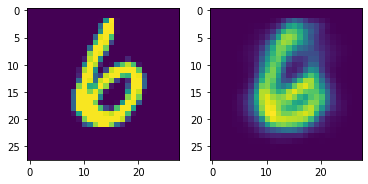

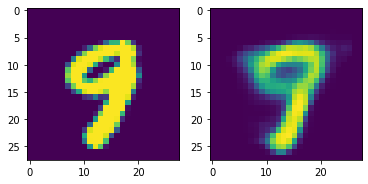

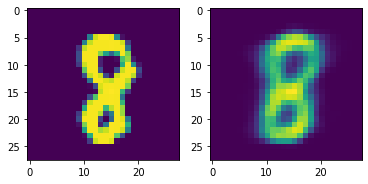

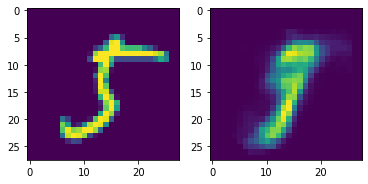

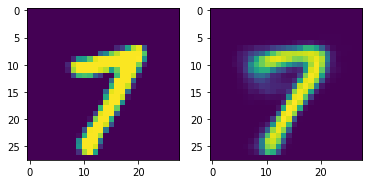

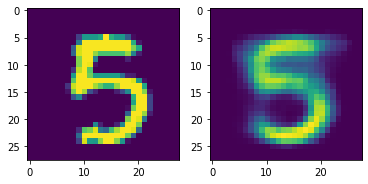

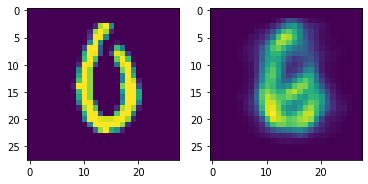

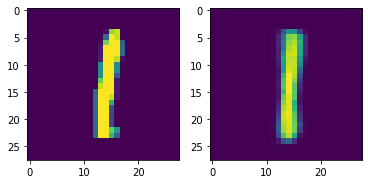

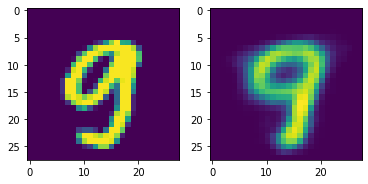

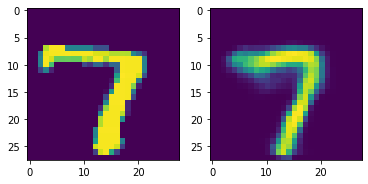

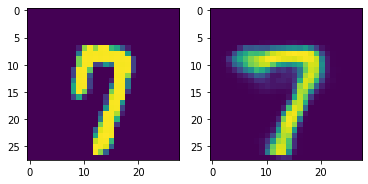

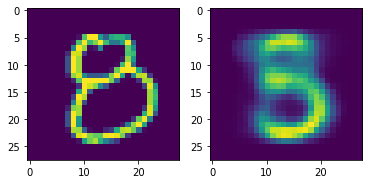

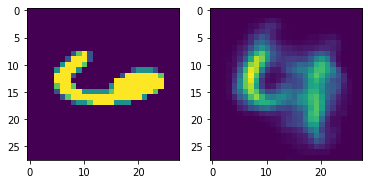

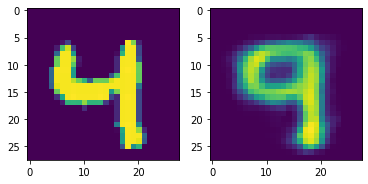

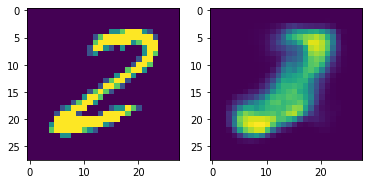

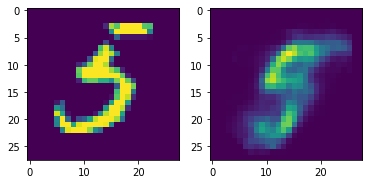

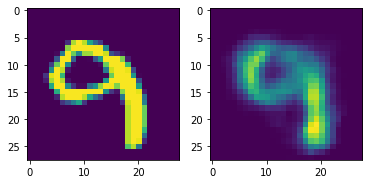

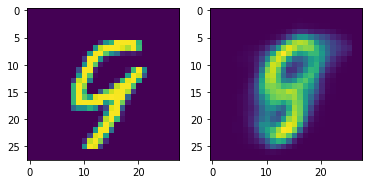

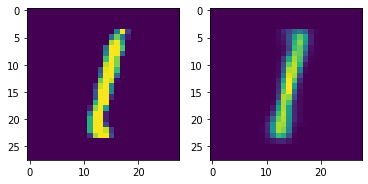

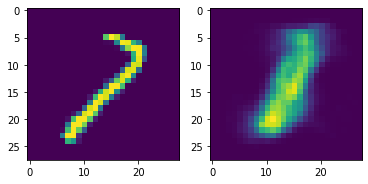

In [ ]:
indx = (len(testX) * np.random.rand(20)).astype(int)

x = dense1(testX[indx])
x = dense2(x)
m = dense_m(x)
v = dense_v(x)
x = m + v * tf.random.normal(v.shape)
x = dense4(x)
x = dense5(x)
pred = dense6(x).numpy()

pred = pred.reshape(len(indx), 28, 28)
original = testX[indx].reshape(len(indx), 28, 28)

for i in range(len(indx)):
  fig = plt.figure()
  fig.add_subplot(1, 2, 1)
  plt.imshow(original[i])
  fig.add_subplot(1, 2, 2)
  plt.imshow(pred[i])
  plt.show()

# Play with latent neurons

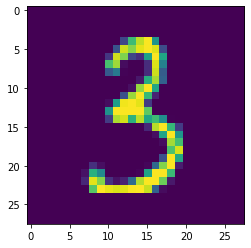

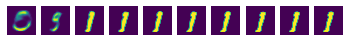

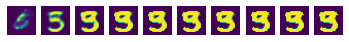

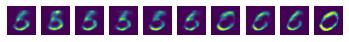

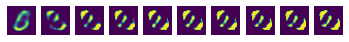

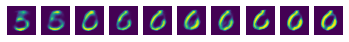

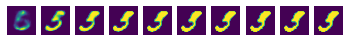

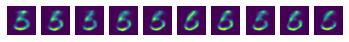

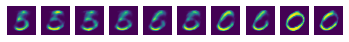

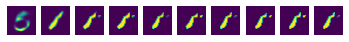

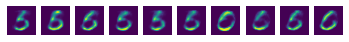

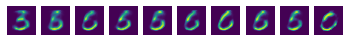

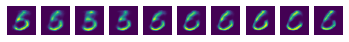

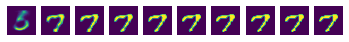

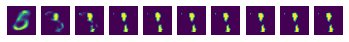

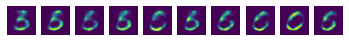

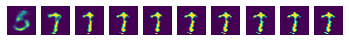

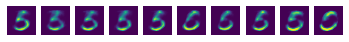

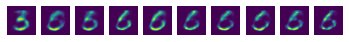

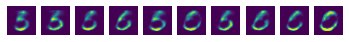

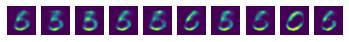

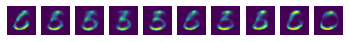

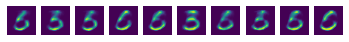

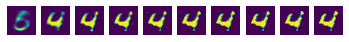

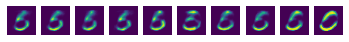

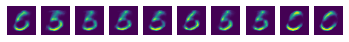

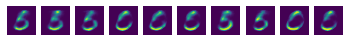

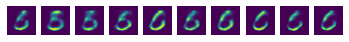

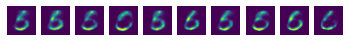

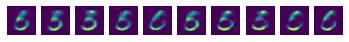

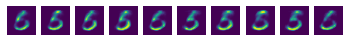

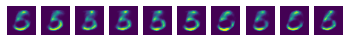

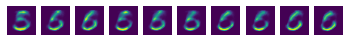

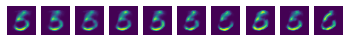

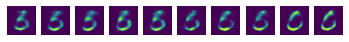

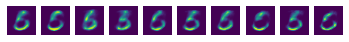

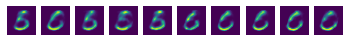

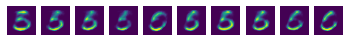

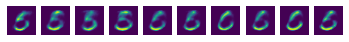

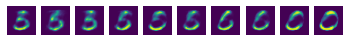

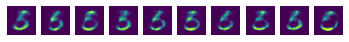

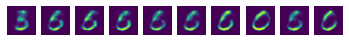

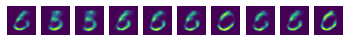

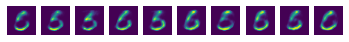

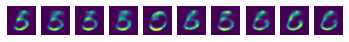

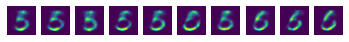

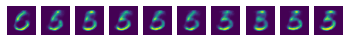

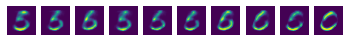

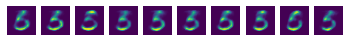

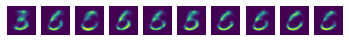

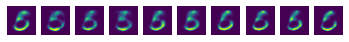

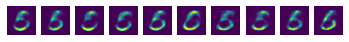

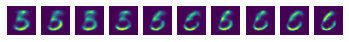

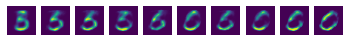

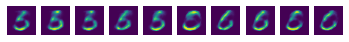

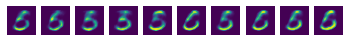

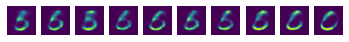

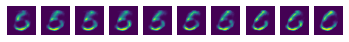

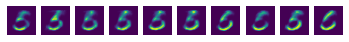

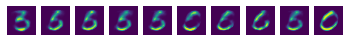

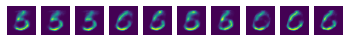

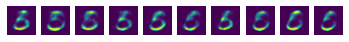

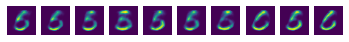

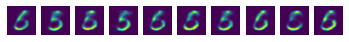

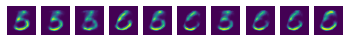

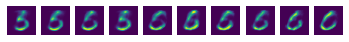

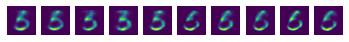

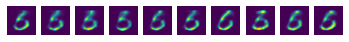

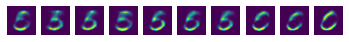

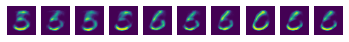

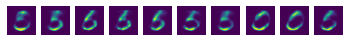

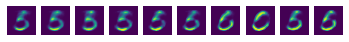

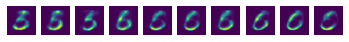

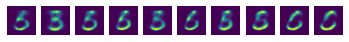

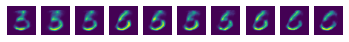

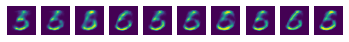

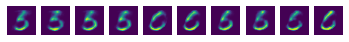

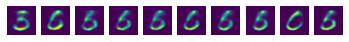

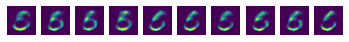

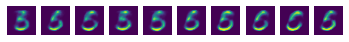

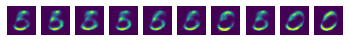

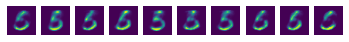

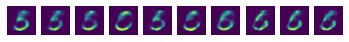

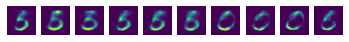

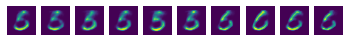

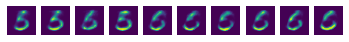

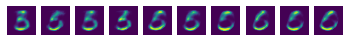

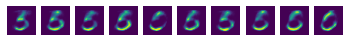

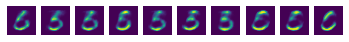

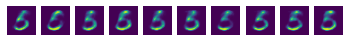

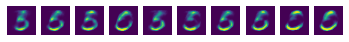

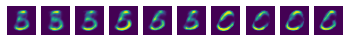

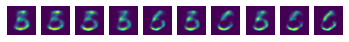

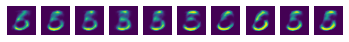

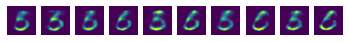

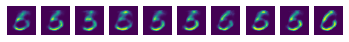

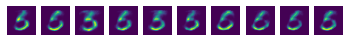

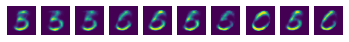

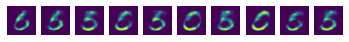

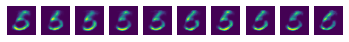

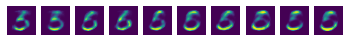

In [ ]:
# 76, 67, 1376, 99
sample = np.array([testX[76]])
plt.imshow(sample.reshape(28, 28))
plt.show()

for changing_num in range(h_units):
  fig = plt.figure()
  for i, changing_val in enumerate(np.arange(0, 50, 5)):
    x = dense1(sample)
    x = dense2(x)
    m = dense_m(x)
    v = dense_v(x)
    x = m + 5 * v * tf.random.normal(v.shape)
    x = force_neurons(x.numpy(), [[changing_num, changing_val]])
    x = dense4(x)
    x = dense5(x)
    y = dense6(x)
    
    fig.add_subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(y.numpy().reshape(28, 28))
  plt.show()

In [ ]:
print(m)
print(v)

tf.Tensor(
[[1.01208    1.769409   0.         1.1143496  0.         0.9090686
  0.         0.         0.5487234  0.         0.         0.
  0.2234933  0.7090753  0.         0.03497525 0.         0.
  0.         0.         0.         0.         0.11480206 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.       

# Conclusion

## Basic AE 
- layers: 64 > 32 > 10
- changes: 0 -> 30, 3

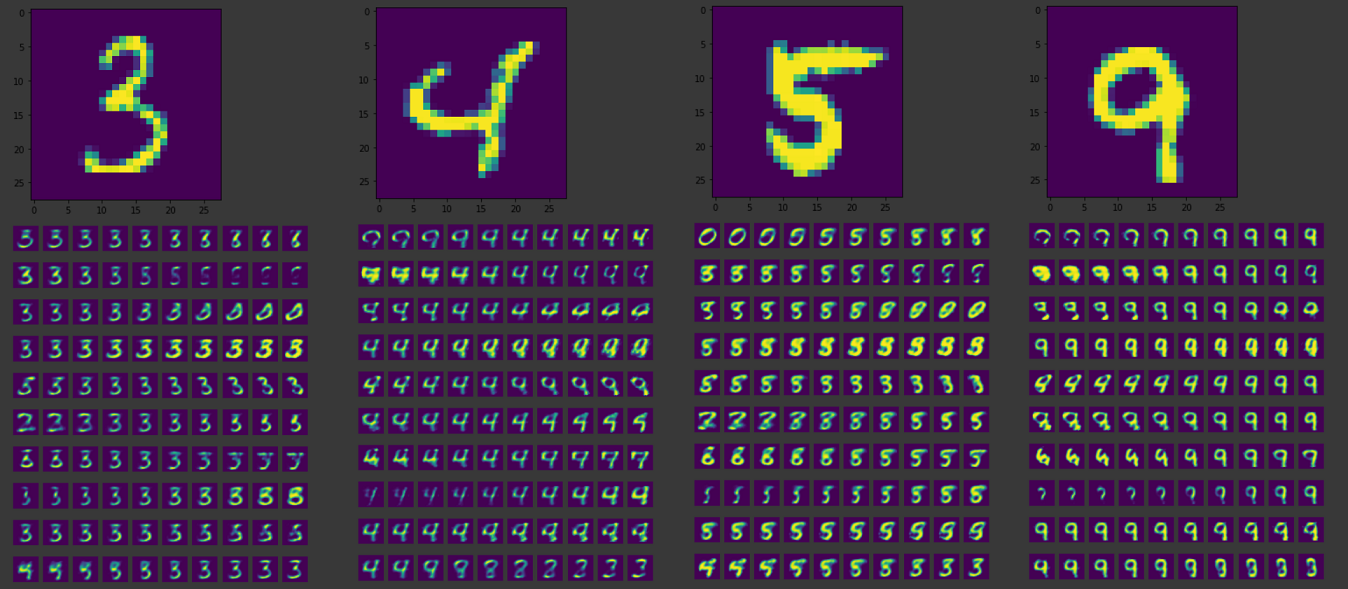

## Regularized AE
- layers: 64 > 32 > 10
- changes: 0 -> 2, 0.2

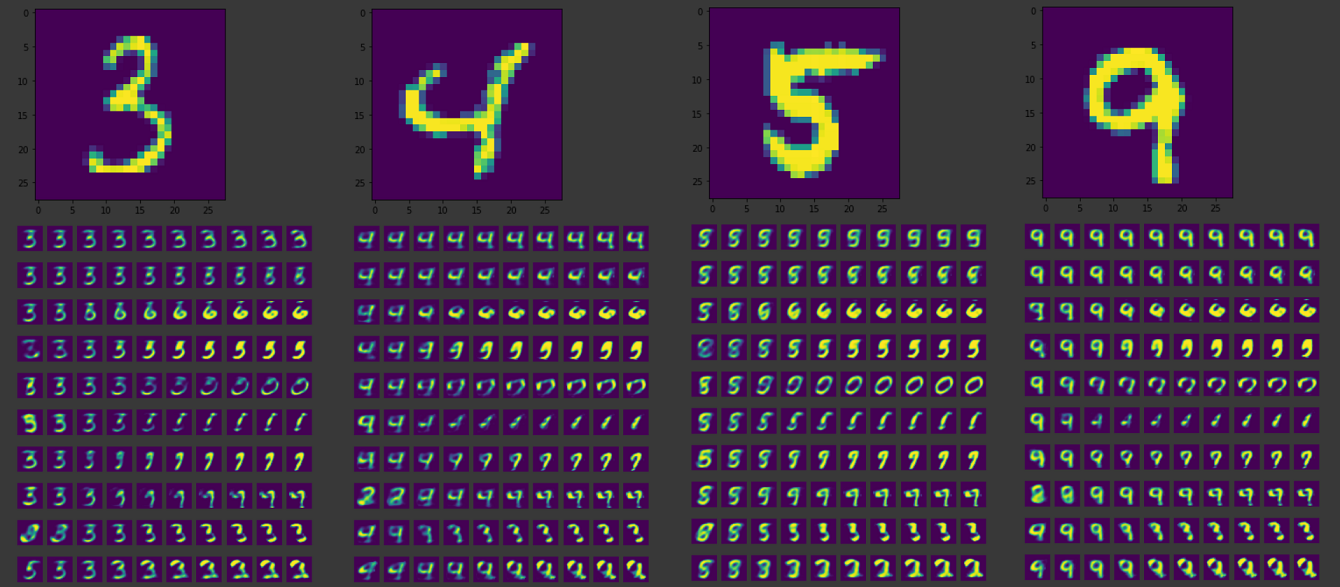

## Disentangled VAE
- layers: 128 > 128 > 100
- changes: 0 -> 50, 5

So interesting. For high lambda (0.1), the VAE decided to just use one (or another time two) of its latent neurons (zero deviation and any needed mean), and let the others to satisfy the regularization term. If we decrease the lambda, more neurons will be affective.

In the figure below of course if we had two affective latent neurons, we could get much better results.

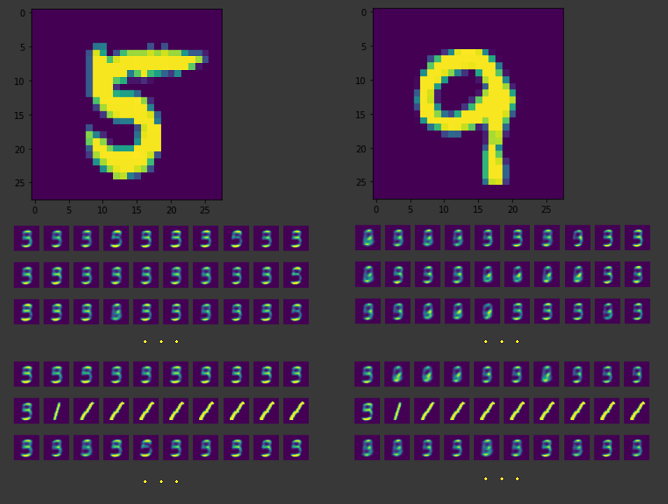

## Ordered disentangled VAE
- layers: 128 > 128 > 100
- changes: 0 -> 50, 5

Selects the effictive neurons from early neurons of the latent layer.